# Sentimen Analisis Aplikasi Playstore

# Import Library yang dibutuhkan

In [1]:
!pip install google-play-scraper
!pip install sastrawi
!pip install optuna
!pip install nlpaug
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 16.2 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=ebeb1c39710abcb066c8bd33a6574109aa30850679a9aa3297578baedda741a7
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [2]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import re
import string
import csv
import optuna
import requests

from itertools import count

from gensim.models import Word2Vec

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Dense, Dropout, Concatenate, BatchNormalization, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Scrapping Dataset

In [3]:
from google_play_scraper import app, reviews, Sort
import pandas as pd

# ID aplikasi HOK di Playstore (ganti dengan ID yang benar jika berbeda)
app_id = 'com.levelinfinite.sgameGlobal'  # Ganti dengan ID aplikasi HOK yang sesuai

# Fungsi untuk mendapatkan metadata aplikasi
def get_app_info(app_id):
    app_info = app(app_id)
    return app_info

# Fungsi untuk mengunduh ulasan aplikasi
def get_reviews(app_id, count=10000):
    # Ambil ulasan
    result, _ = reviews(
        app_id,
        lang='id',  # Bahasa ulasan: 'id' untuk Bahasa Indonesia
        country='id',  # Negara: Indonesia
        sort=Sort.NEWEST,  # Ulasan terbaru
        count=count  # Jumlah ulasan yang ingin diambil
    )
    return result

# Eksekusi fungsi
if __name__ == "__main__":
    print("Mengambil metadata aplikasi...")
    app_info = get_app_info(app_id)
    print(f"Nama Aplikasi: {app_info['title']}")
    print(f"Deskripsi Singkat: {app_info['summary']}")

    print("\nMengambil ulasan aplikasi...")
    reviews_data = get_reviews(app_id, count=15000)  # Ambil 10000 ulasan

    print(f"Jumlah ulasan yang diambil: {len(reviews_data)}")

    # Convert ke DataFrame untuk analisis
    ulasan_hok = pd.DataFrame(reviews_data)
    ulasan_hok = ulasan_hok[['content', 'score', 'at', 'userName']]  # Pilih kolom yang relevan

    # Simpan ke file CSV
    output_file = "hok_reviews.csv"
    ulasan_hok.to_csv(output_file, index=False, encoding='utf-8')
    print(f"Data ulasan berhasil disimpan ke {output_file}")

Mengambil metadata aplikasi...
Nama Aplikasi: Honor of Kings
Deskripsi Singkat: The Ultimate 5v5 Hero Battle Game. Team up for ultimate MOBA Games.

Mengambil ulasan aplikasi...
Jumlah ulasan yang diambil: 15000
Data ulasan berhasil disimpan ke hok_reviews.csv


# Load Dataset

In [4]:
app_reviews_df = pd.DataFrame(ulasan_hok)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [5]:
# Fungsi untuk eksplorasi awal dataset
def explore_data(app_reviews_df, app_name):
    print(f"--- Eksplorasi Data untuk {app_name} ---")

    # 1. Info Dataset
    print("\nInfo Dataset:")
    print(app_reviews_df.info())

    # 2. Statistik Deskriptif
    print("\nStatistik Deskriptif:")
    print(app_reviews_df.describe())

    # 3. Distribusi Rating
    print("\nDistribusi Rating:")
    print(app_reviews_df['score'].value_counts())

explore_data(app_reviews_df, 'HOK')

--- Eksplorasi Data untuk HOK ---

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   content   15000 non-null  object        
 1   score     15000 non-null  int64         
 2   at        15000 non-null  datetime64[ns]
 3   userName  15000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 468.9+ KB
None

Statistik Deskriptif:
              score                             at
count  15000.000000                          15000
mean       4.126667  2025-01-23 08:17:58.661533440
min        1.000000            2025-01-09 00:44:35
25%        4.000000  2025-01-10 15:28:41.750000128
50%        5.000000     2025-01-21 05:02:37.500000
75%        5.000000            2025-02-02 13:46:55
max        5.000000            2025-02-17 14:27:49
std        1.479404                            NaN

Distribu

# Pre-processing Data

In [6]:
# Mendefinisikan fungsi-fungsi untuk preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [7]:
kbba_dictionary = pd.read_csv('https://raw.githubusercontent.com/insomniagung/kamus_kbba/main/kbba.txt', delimiter='\t', names=['slang', 'formal'], header=None, encoding='utf-8')

slang_dict = dict(zip(kbba_dictionary['slang'], kbba_dictionary['formal']))
kbba_dictionary

def fix_slangwords(text):
    words = text.split()

    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

In [8]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
app_reviews_df['text_clean'] = app_reviews_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
app_reviews_df['text_casefoldingText'] = app_reviews_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
app_reviews_df['text_slangwords'] = app_reviews_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
app_reviews_df['text_tokenizingText'] = app_reviews_df['text_casefoldingText'].apply(tokenizingText) # This line was previously commented out. Uncomment to create the column.

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
app_reviews_df['text_stopword'] = app_reviews_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
app_reviews_df['text_akhir'] = app_reviews_df['text_stopword'].apply(toSentence)

In [9]:
app_reviews_df.sample(10)

,content,score,at,userName,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
13004,game nya keren dan sangat seru,5,2025-01-09 10:46:47,Pengguna Google,game nya keren dan sangat seru,game nya keren dan sangat seru,game nya keren dan sangat seru,"[game, nya, keren, dan, sangat, seru]","[game, keren, seru]",game keren seru
10412,lebih asik daripada ml,5,2025-01-12 05:12:08,Pengguna Google,lebih asik daripada ml,lebih asik daripada ml,lebih asik daripada ml,"[lebih, asik, daripada, ml]","[asik, ml]",asik ml
5054,fine,2,2025-01-29 05:23:06,Pengguna Google,fine,fine,fine,[fine],[fine],fine
39,"Game nya bagus banget,bisa buat Mabar sama tem...",5,2025-02-17 12:16:11,Pengguna Google,Game nya bagus bangetbisa buat Mabar sama teme...,game nya bagus bangetbisa buat mabar sama teme...,game nya bagus bangetbisa buat mabar sama tema...,"[game, nya, bagus, bangetbisa, buat, mabar, sa...","[game, bagus, bangetbisa, mabar, temen, sayang...",game bagus bangetbisa mabar temen sayangnya pa...
10011,Beuuhhh terlalu seru game play ya,5,2025-01-13 03:47:31,Pengguna Google,Beuuhhh terlalu seru game play ya,beuuhhh terlalu seru game play ya,beuuhhh terlalu seru game play iya,"[beuuhhh, terlalu, seru, game, play, ya]","[beuuhhh, seru, game, play]",beuuhhh seru game play
12973,ok,5,2025-01-09 10:54:20,Pengguna Google,ok,ok,ok,[ok],[ok],ok
4685,"Perbaiki laporan pemain , nemu tim tolol tank ...",1,2025-01-30 09:20:03,Pengguna Google,Perbaiki laporan pemain nemu tim tolol tank y...,perbaiki laporan pemain nemu tim tolol tank y...,perbaiki laporan pemain nemu tim sangat bodoh ...,"[perbaiki, laporan, pemain, nemu, tim, tolol, ...","[perbaiki, laporan, pemain, nemu, tim, tolol, ...",perbaiki laporan pemain nemu tim tolol tank yg...
9832,"kualitas nya bagus+asik , dan enak di mainkan,...",4,2025-01-13 12:21:56,Pengguna Google,kualitas nya bagusasik dan enak di mainkan po...,kualitas nya bagusasik dan enak di mainkan po...,kualitas nya bagusasik dan enak di mainkan pok...,"[kualitas, nya, bagusasik, dan, enak, di, main...","[kualitas, bagusasik, enak, mainkan, pokonya, ...",kualitas bagusasik enak mainkan pokonya kalian...
2485,baguss,5,2025-02-08 04:54:40,Pengguna Google,baguss,baguss,baguss,[baguss],[baguss],baguss
5725,good,5,2025-01-27 07:06:57,Pengguna Google,good,good,bagus,[good],[good],good


# Pelabelan

Sentiment
Negatif     2723
Netral       680
Positif    11597
Name: count, dtype: int64


<ipython-input-10-607ff54259b6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_reviews_df, x='Sentiment', palette="Set2")
<ipython-input-10-607ff54259b6>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Aplikasi')


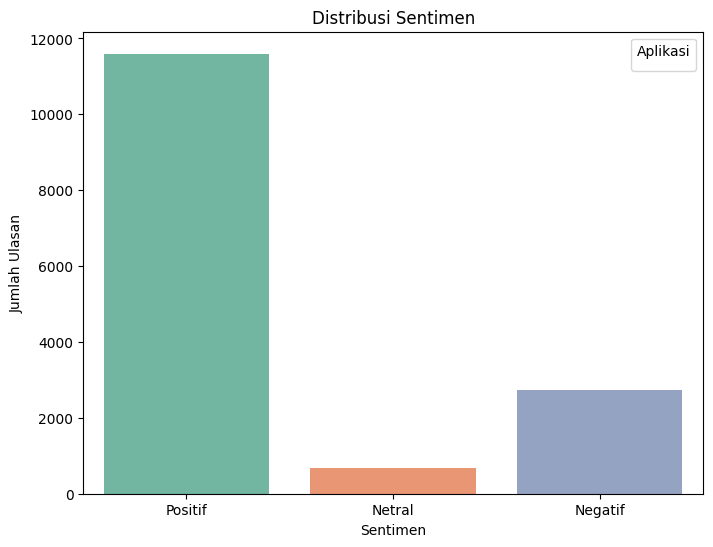

In [10]:
#Klasifikasi sentimen berdasarkan score
def score_sentiment_classification(score):
    if score >= 4:
        return 'Positif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Negatif'

app_reviews_df['Sentiment'] = app_reviews_df['score'].apply(score_sentiment_classification)
sorted_sentiment_counts = app_reviews_df['Sentiment'].value_counts().sort_index()
print(sorted_sentiment_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=app_reviews_df, x='Sentiment', palette="Set2")
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.legend(title='Aplikasi')
plt.show()

# Data Preparation

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Pisahkan fitur (X) dan label (y)
X = app_reviews_df['text_akhir']  # Kolom teks yang sudah dipreprocessing
y = app_reviews_df['Sentiment']   # Kolom label sentimen

# 2. Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Anda dapat menyesuaikan max_features

# 4. Fit dan transform data training dengan TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train)

# 5. Transform data testing dengan TF-IDF yang sudah difit
X_test_tfidf = tfidf.transform(X_test)

# 6. Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)  # Anda dapat menyesuaikan random_state
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Splitting data: 80% training, 20% testing
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan lagi training menjadi training (80%) dan validation (20% dari training)
X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# # Assuming X_train_tfidf and y_train are defined
# smote = SMOTE(random_state=42)  # Initialize SMOTE
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek jumlah data train dan test
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

# Cek jumlah data train dan validation
print("Jumlah data latih:", len(X_train))
print("Jumlah data validasi:", len(X_val))

# Sekarang Anda memiliki:
# - X_train_resampled: Fitur training setelah SMOTE (dalam bentuk TF-IDF)
# - y_train_resampled: Label training setelah SMOTE
# - X_test_tfidf: Fitur testing (dalam bentuk TF-IDF)
# - y_test: Label testing

# Anda dapat melanjutkan dengan melatih model machine learning Anda
# menggunakan X_train_resampled dan y_train_resampled,
# dan mengujinya dengan X_test_tfidf dan y_test.

Jumlah data latih: 12000
Jumlah data uji: 3000
Jumlah data latih: 12000
Jumlah data validasi: 2400


In [12]:
# Encode label
y = LabelEncoder().fit_transform(app_reviews_df['Sentiment'])
# X_text = app_reviews_df['text_akhir']
X = app_reviews_df['text_akhir']

# ============================
# Terapkan SMOTE pada data training
# ============================
# 1. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# 2. Fit and transform your training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# 3. Transform your testing and validation data
X_test_tfidf = vectorizer.transform(X_test)
X_val_tfidf = vectorizer.transform(X_val)

# 4. Now apply SMOTE to the numerical TF-IDF representation
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Splitting data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan lagi training menjadi training (80%) dan validation (20% dari training)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# # Assuming X_train_tfidf and y_train are defined
# smote = SMOTE(random_state=42)  # Initialize SMOTE
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek jumlah data train dan test
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

# Cek jumlah data train dan validation
print("Jumlah data latih:", len(X_train))
print("Jumlah data validasi:", len(X_val))

Jumlah data latih: 9600
Jumlah data uji: 3000
Jumlah data latih: 9600
Jumlah data validasi: 2400


# Membangun Model

In [13]:
# 📌 Ekstraksi Fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
# Model 1: Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon

svm_params = {
    'C': expon(scale=100),  # Distribusi eksponensial untuk C
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': expon(scale=.1),  # Distribusi eksponensial untuk gamma
    'degree': [2, 3, 4],  # Hanya untuk kernel 'poly'
    'coef0': uniform(loc=-1, scale=2)  # Hanya untuk kernel 'poly' dan 'sigmoid'
}

svm_model = SVC(probability=True)
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=5, scoring='accuracy', random_state=42)
svm_random.fit(X_train_tfidf, y_train)

# Model terbaik untuk SVM
best_svm = svm_random.best_estimator_
print("Best parameters for SVM:", svm_random.best_params_)

# Evaluasi SVM pada validation set
val_predictions_svm = best_svm.predict(X_val_tfidf)
print("Hasil evaluasi SVM pada validation set:")
print(classification_report(y_val, val_predictions_svm))

# Evaluasi SVM pada test set
test_predictions_svm = best_svm.predict(X_test_tfidf)
test_probabilities_svm = best_svm.predict_proba(X_test_tfidf)
print("Hasil evaluasi SVM pada test set:")
print(classification_report(y_test, test_predictions_svm))

Best parameters for SVM: {'C': 8.430956798241278, 'coef0': -0.2606910878771911, 'degree': 2, 'gamma': 0.13027489284923163, 'kernel': 'sigmoid'}
Hasil evaluasi SVM pada validation set:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       441
           1       0.00      0.00      0.00       106
           2       0.87      0.95      0.91      1853

    accuracy                           0.84      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.80      0.84      0.82      2400

Hasil evaluasi SVM pada test set:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       516
           1       0.00      0.00      0.00       150
           2       0.89      0.96      0.92      2334

    accuracy                           0.86      3000
   macro avg       0.53      0.53      0.53      3000
weighted avg       0.81      0.86      0.83      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
!touch requirements.txt
!pip freeze > requirements.txt

In [22]:
!cat requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.12
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.1
alembic==1.14.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.10.0.33.26
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
augly==1.0.0
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.36.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlog==6.9.0
colorlover==0.3.0
colour==0.1.5
c